- [Dados de covid](https://brasil.io/)
- [Ações do Google](https://finance.yahoo.com/quote/GOOG/history?p=GOOG)
- [Dados refugiados](https://www.migrationdataportal.org/international-data?i=refug_host&t=2021&cm49=76)
- Corrente elétrica que passa por um resistor

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# Dados de covid

# Ações do Google

In [4]:
goog = yf.Ticker("goog")

In [9]:
df_goog = goog.history(start="2022-06-01", end="2022-07-09")

In [17]:
df_goog.index

DatetimeIndex(['2022-06-01', '2022-06-02', '2022-06-03', '2022-06-06',
               '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
               '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16',
               '2022-06-17', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

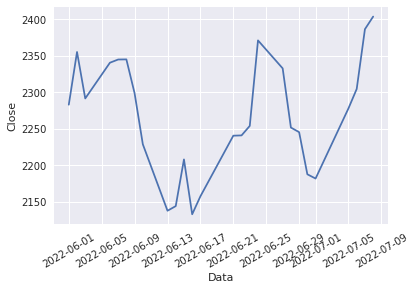

In [34]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(df_goog.index,df_goog['Close'])
ax.set_ylabel("Close")
ax.set_xlabel("Data")
plt.xticks(rotation=30);
plt.savefig("imagens/acoes_goog.eps")

# Refugiados

In [11]:
colunas = ["Year", "Country of Origin", "Country of Asylum", "Refugees under UNHCR’s mandate", "Asylum seekers", "IDPs of concern to UNHCR", "Venezuelans displaced abroad",  "Stateless persons", "Others of concern"]
columns_mapper = {i:colunas[i] for i in range(len(colunas))}
refugiados_brasil = pd.read_csv("datasets/refugees_br.csv",sep='\t', header=None)
refugiados_brasil.rename(columns=columns_mapper, inplace=True)
refugiados_brasil.sort_values(by='Year', inplace=True)

In [12]:
refugiados_brasil.head()

,Year,Country of Origin,Country of Asylum,Refugees under UNHCR’s mandate,Asylum seekers,IDPs of concern to UNHCR,Venezuelans displaced abroad,Stateless persons,Others of concern
52,1969,-,Brazil (BRA),40000,0,0,NaN,0,0
51,1970,-,Brazil (BRA),40000,0,0,NaN,0,0
33,1971,-,Brazil (BRA),38000,0,0,NaN,0,0
32,1972,-,Brazil (BRA),37000,0,0,NaN,0,0
50,1973,-,Brazil (BRA),35200,0,0,NaN,0,0


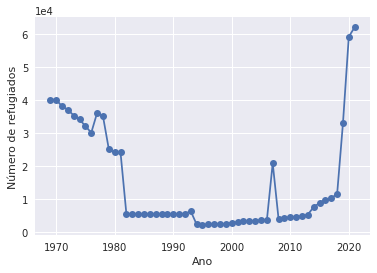

In [23]:
fig, ax = plt.subplots(figsize=(6,4))
ano = refugiados_brasil['Year']
nrefugiados = refugiados_brasil['Refugees under UNHCR’s mandate']
ax.plot(ano, nrefugiados, marker='o')
ax.set_xlabel("Ano")
ax.set_ylabel("Número de refugiados")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.savefig("imagens/refugiados_brasil_onu.eps")